In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("data.csv")

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
len(raw_data)

569

In [5]:
training_data_len = int(0.70 * len(raw_data))

In [6]:
training_data = raw_data.iloc[0:training_data_len,:]

In [7]:
testing_data = raw_data.iloc[training_data_len:,:]

In [8]:
training_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,23.41,158.80,1956.0,0.12380,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,25.53,152.50,1709.0,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,26.50,98.87,567.7,0.20980,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,23.75,103.40,741.6,0.17910,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,27.66,153.20,1606.0,0.14420,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,28.14,110.60,897.0,0.16540,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,40.68,97.65,711.4,0.18530,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


In [9]:
column_names = raw_data.columns

In [10]:
column_names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
training_data.drop([column_names[0],column_names[32]],axis=1,inplace=True)

In [12]:
training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.47,23.75,103.40,741.6,0.17910,0.5249,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.88,27.66,153.20,1606.0,0.14420,0.2576,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.06,28.14,110.60,897.0,0.16540,0.3682,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.09,40.68,97.65,711.4,0.18530,1.0580,1.10500,0.22100,0.4366,0.20750


In [13]:
training_data = pd.DataFrame(training_data)

In [14]:
training_data['diagnosis'].replace(to_replace='B',value=0,inplace=True)

In [15]:
training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.47,23.75,103.40,741.6,0.17910,0.5249,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.88,27.66,153.20,1606.0,0.14420,0.2576,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.06,28.14,110.60,897.0,0.16540,0.3682,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.09,40.68,97.65,711.4,0.18530,1.0580,1.10500,0.22100,0.4366,0.20750


In [16]:
training_data['diagnosis'].replace(to_replace='M',value=1,inplace=True)

In [17]:
training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.47,23.75,103.40,741.6,0.17910,0.5249,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.88,27.66,153.20,1606.0,0.14420,0.2576,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.06,28.14,110.60,897.0,0.16540,0.3682,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.09,40.68,97.65,711.4,0.18530,1.0580,1.10500,0.22100,0.4366,0.20750


In [18]:
class_labels = training_data['diagnosis']

In [19]:
class_labels 

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
368    1
369    1
370    1
371    0
372    1
373    1
374    0
375    0
376    0
377    0
378    0
379    1
380    0
381    0
382    0
383    0
384    0
385    1
386    0
387    0
388    0
389    1
390    0
391    0
392    1
393    1
394    0
395    0
396    0
397    0
Name: diagnosis, Length: 398, dtype: int64

In [20]:
C = np.array(class_labels)

In [21]:
C.shape

(398,)

In [22]:
C= C.reshape(C.shape[0],1)

In [23]:
C.shape

(398, 1)

In [24]:
pure_training_data = training_data.drop(['diagnosis'],axis=1,inplace=False)

In [25]:
pure_training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.17910,0.5249,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.14420,0.2576,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.16540,0.3682,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.18530,1.0580,1.10500,0.22100,0.4366,0.20750


In [26]:
N = pure_training_data.shape[0]

n = pure_training_data.shape[1]

In [27]:
N

398

In [28]:
n 

30

In [29]:
X = np.array(pure_training_data)

In [30]:
X = X/np.max(X,axis=0)

In [31]:
X

array([[0.63998577, 0.26425662, 0.65145889, ..., 0.91202749, 0.69313046,
        0.57301205],
       [0.73176805, 0.45239308, 0.70503979, ..., 0.63917526, 0.41428141,
        0.42901205],
       [0.70046247, 0.54098778, 0.68965517, ..., 0.83505155, 0.54429045,
        0.42207229],
       ...,
       [0.50017787, 0.43737271, 0.47612732, ..., 0.27185567, 0.38008436,
        0.31850602],
       [0.48061188, 0.48090631, 0.46737401, ..., 0.49931271, 0.401627  ,
        0.37040964],
       [0.45535397, 0.44450102, 0.44058355, ..., 0.28508591, 0.2994878 ,
        0.33990361]])

In [32]:
X1_transpose = X[0,:]

In [33]:
X1_transpose.shape

(30,)

In [34]:
theta0_initial = np.random.randn(1,1)

In [35]:
theta0_initial

array([[0.8289665]])

In [36]:
theta_initial = np.random.randn(X.shape[1],1)

In [37]:
theta_initial

array([[ 0.97117762],
       [-0.14220553],
       [-1.628976  ],
       [ 0.23694651],
       [ 0.73021032],
       [ 0.68808937],
       [ 1.37938141],
       [-0.01782984],
       [-0.26925857],
       [ 0.27725209],
       [ 0.23457772],
       [ 0.26680533],
       [-0.9233636 ],
       [ 0.1636162 ],
       [-0.33322649],
       [ 0.21646121],
       [-0.36613336],
       [-0.92324883],
       [-0.7208873 ],
       [-0.37244238],
       [ 0.89459961],
       [-0.74591273],
       [ 0.23572825],
       [-0.12276295],
       [ 0.81268653],
       [-1.44478363],
       [ 1.68566662],
       [ 1.46459961],
       [-1.42061319],
       [-0.12050718]])

In [38]:
epsilon = 0.0001
alpha = 0.01

In [39]:
power = (theta0_initial + np.matmul(X,theta_initial))

In [40]:
power

array([[3.18637818],
       [2.05347078],
       [2.4900586 ],
       [1.93712379],
       [2.54279519],
       [2.27169927],
       [2.34592107],
       [1.80907091],
       [2.29108484],
       [2.45735773],
       [1.15819101],
       [1.59221332],
       [1.29722822],
       [1.12847907],
       [2.37394265],
       [1.93034377],
       [1.91090071],
       [2.56250124],
       [2.82302871],
       [1.63297122],
       [1.3207201 ],
       [1.11011253],
       [2.19518972],
       [2.35502753],
       [2.66754345],
       [2.51086382],
       [2.21936067],
       [1.99865968],
       [2.23586657],
       [1.80109291],
       [2.62668234],
       [1.81039567],
       [2.71412052],
       [2.13017506],
       [1.97126194],
       [1.85068494],
       [1.72489046],
       [1.00143257],
       [0.75778398],
       [2.46762465],
       [1.19816817],
       [2.14904718],
       [1.60955719],
       [1.79712037],
       [1.77732982],
       [2.90896992],
       [0.58543641],
       [2.257

In [41]:
H_theta0_theta = 1/(1+ np.exp(-power))

In [42]:
H_theta0_theta

array([[0.96031843],
       [0.88629785],
       [0.92344195],
       [0.87403582],
       [0.927088  ],
       [0.90650591],
       [0.91260947],
       [0.85924955],
       [0.90813599],
       [0.92109785],
       [0.76100386],
       [0.83092727],
       [0.78536813],
       [0.75555811],
       [0.9148186 ],
       [0.87328746],
       [0.8711203 ],
       [0.92840888],
       [0.94390764],
       [0.83657626],
       [0.78930149],
       [0.75215009],
       [0.89981671],
       [0.91333301],
       [0.93508407],
       [0.92489991],
       [0.90197468],
       [0.88065628],
       [0.90342442],
       [0.85828192],
       [0.93255919],
       [0.85940969],
       [0.93785474],
       [0.89380163],
       [0.87774659],
       [0.8642075 ],
       [0.84875769],
       [0.73134015],
       [0.68087242],
       [0.92184079],
       [0.76819875],
       [0.89557971],
       [0.8333499 ],
       [0.85779804],
       [0.85536684],
       [0.94828808],
       [0.64231736],
       [0.905

In [43]:
temp = (H_theta0_theta - C)

In [44]:
temp 

array([[-0.03968157],
       [-0.11370215],
       [-0.07655805],
       [-0.12596418],
       [-0.072912  ],
       [-0.09349409],
       [-0.08739053],
       [-0.14075045],
       [-0.09186401],
       [-0.07890215],
       [-0.23899614],
       [-0.16907273],
       [-0.21463187],
       [-0.24444189],
       [-0.0851814 ],
       [-0.12671254],
       [-0.1288797 ],
       [-0.07159112],
       [-0.05609236],
       [ 0.83657626],
       [ 0.78930149],
       [ 0.75215009],
       [-0.10018329],
       [-0.08666699],
       [-0.06491593],
       [-0.07510009],
       [-0.09802532],
       [-0.11934372],
       [-0.09657558],
       [-0.14171808],
       [-0.06744081],
       [-0.14059031],
       [-0.06214526],
       [-0.10619837],
       [-0.12225341],
       [-0.1357925 ],
       [-0.15124231],
       [ 0.73134015],
       [-0.31912758],
       [-0.07815921],
       [-0.23180125],
       [-0.10442029],
       [-0.1666501 ],
       [-0.14220196],
       [-0.14463316],
       [-0

In [45]:
temp.shape

(398, 1)

In [46]:
dels = np.matmul((X.T),temp)

In [47]:
dels

array([[60.90421644],
       [62.25673712],
       [58.14195081],
       [24.01526006],
       [94.2761238 ],
       [31.55401042],
       [13.27083245],
       [14.70818834],
       [84.51188316],
       [96.2660024 ],
       [12.79814351],
       [35.52702343],
       [11.6275727 ],
       [ 4.38835849],
       [34.46194558],
       [23.20303298],
       [10.23269773],
       [27.15427356],
       [39.53328799],
       [18.90081993],
       [55.74930256],
       [64.24859314],
       [52.09582372],
       [19.8166937 ],
       [81.67016923],
       [22.37768624],
       [16.8194841 ],
       [32.11171145],
       [59.05291251],
       [55.87528224]])

In [48]:
dels.shape

(30, 1)

In [49]:
i = 0
alpha = 0.1
epsilon = 0.000001

neg_log_like_loss = []
iterations = []


while (True):
    
    power_initial = theta0_initial + np.matmul(X,theta_initial)
    H_theta0_theta_initial = 1/(1 + np.exp(-power_initial))
    temp = (H_theta0_theta_initial - C)
    dels = np.matmul(X.T,temp)/N
    
    #The code above is calculating the matix of derivatives wrt all thetas except theta0
    
    neg_log_like_initial = -(np.matmul(C.T,np.log(H_theta0_theta_initial)) + (np.matmul((1-C).T,np.log(1-H_theta0_theta_initial))))/N
    
    #The statement above is computing the value of Negative Log Likelhood function at initial values of Thetas
    
    theta0_final = theta0_initial - (alpha*(np.sum(temp))/N)
    theta_final = theta_initial - alpha*dels
    
    
    #The code above is updating the values of Thetas using Gradient Descent
    
    
    power_final = theta0_final + np.matmul(X,theta_final)
    H_theta0_theta_final = 1/(1 + np.exp(-power_final))
    neg_log_like_final = -(np.matmul(C.T,np.log(H_theta0_theta_final)) + (np.matmul((1-C).T,np.log(1-H_theta0_theta_final))))/N 
    
    #The code above is recomputing the value of Negative Log Likelihood Function at updated values of Thetas
    
    if abs(neg_log_like_initial - neg_log_like_final) < epsilon:
        
        break 
    
    
    theta0_initial = theta0_final
    theta_initial = theta_final
    
    i += 1
    
    iterations.append(i)
    neg_log_like_loss.append(neg_log_like_initial)
    
    print("The value of Negative Log Likelihood Function in iteration # {} is {}".format(i, neg_log_like_initial))

The value of Negative Log Likelihood Function in iteration # 1 is [[0.8604134]]
The value of Negative Log Likelihood Function in iteration # 2 is [[0.80459678]]
The value of Negative Log Likelihood Function in iteration # 3 is [[0.75705383]]
The value of Negative Log Likelihood Function in iteration # 4 is [[0.71714681]]
The value of Negative Log Likelihood Function in iteration # 5 is [[0.68408246]]
The value of Negative Log Likelihood Function in iteration # 6 is [[0.65698686]]
The value of Negative Log Likelihood Function in iteration # 7 is [[0.63497424]]
The value of Negative Log Likelihood Function in iteration # 8 is [[0.61720096]]
The value of Negative Log Likelihood Function in iteration # 9 is [[0.6029013]]
The value of Negative Log Likelihood Function in iteration # 10 is [[0.59140613]]
The value of Negative Log Likelihood Function in iteration # 11 is [[0.58214803]]
The value of Negative Log Likelihood Function in iteration # 12 is [[0.57465714]]
The value of Negative Log L

The value of Negative Log Likelihood Function in iteration # 279 is [[0.35495439]]
The value of Negative Log Likelihood Function in iteration # 280 is [[0.35458381]]
The value of Negative Log Likelihood Function in iteration # 281 is [[0.3542146]]
The value of Negative Log Likelihood Function in iteration # 282 is [[0.35384677]]
The value of Negative Log Likelihood Function in iteration # 283 is [[0.35348029]]
The value of Negative Log Likelihood Function in iteration # 284 is [[0.35311517]]
The value of Negative Log Likelihood Function in iteration # 285 is [[0.3527514]]
The value of Negative Log Likelihood Function in iteration # 286 is [[0.35238897]]
The value of Negative Log Likelihood Function in iteration # 287 is [[0.35202786]]
The value of Negative Log Likelihood Function in iteration # 288 is [[0.35166808]]
The value of Negative Log Likelihood Function in iteration # 289 is [[0.35130962]]
The value of Negative Log Likelihood Function in iteration # 290 is [[0.35095246]]
The va

The value of Negative Log Likelihood Function in iteration # 571 is [[0.28418137]]
The value of Negative Log Likelihood Function in iteration # 572 is [[0.28402127]]
The value of Negative Log Likelihood Function in iteration # 573 is [[0.28386153]]
The value of Negative Log Likelihood Function in iteration # 574 is [[0.28370215]]
The value of Negative Log Likelihood Function in iteration # 575 is [[0.28354312]]
The value of Negative Log Likelihood Function in iteration # 576 is [[0.28338444]]
The value of Negative Log Likelihood Function in iteration # 577 is [[0.28322612]]
The value of Negative Log Likelihood Function in iteration # 578 is [[0.28306814]]
The value of Negative Log Likelihood Function in iteration # 579 is [[0.28291052]]
The value of Negative Log Likelihood Function in iteration # 580 is [[0.28275324]]
The value of Negative Log Likelihood Function in iteration # 581 is [[0.28259631]]
The value of Negative Log Likelihood Function in iteration # 582 is [[0.28243973]]
The 

The value of Negative Log Likelihood Function in iteration # 898 is [[0.24545433]]
The value of Negative Log Likelihood Function in iteration # 899 is [[0.24536591]]
The value of Negative Log Likelihood Function in iteration # 900 is [[0.24527763]]
The value of Negative Log Likelihood Function in iteration # 901 is [[0.24518947]]
The value of Negative Log Likelihood Function in iteration # 902 is [[0.24510145]]
The value of Negative Log Likelihood Function in iteration # 903 is [[0.24501355]]
The value of Negative Log Likelihood Function in iteration # 904 is [[0.24492579]]
The value of Negative Log Likelihood Function in iteration # 905 is [[0.24483816]]
The value of Negative Log Likelihood Function in iteration # 906 is [[0.24475065]]
The value of Negative Log Likelihood Function in iteration # 907 is [[0.24466327]]
The value of Negative Log Likelihood Function in iteration # 908 is [[0.24457603]]
The value of Negative Log Likelihood Function in iteration # 909 is [[0.24448891]]
The 

The value of Negative Log Likelihood Function in iteration # 1226 is [[0.22197753]]
The value of Negative Log Likelihood Function in iteration # 1227 is [[0.22191927]]
The value of Negative Log Likelihood Function in iteration # 1228 is [[0.22186107]]
The value of Negative Log Likelihood Function in iteration # 1229 is [[0.22180294]]
The value of Negative Log Likelihood Function in iteration # 1230 is [[0.22174487]]
The value of Negative Log Likelihood Function in iteration # 1231 is [[0.22168686]]
The value of Negative Log Likelihood Function in iteration # 1232 is [[0.22162892]]
The value of Negative Log Likelihood Function in iteration # 1233 is [[0.22157104]]
The value of Negative Log Likelihood Function in iteration # 1234 is [[0.22151322]]
The value of Negative Log Likelihood Function in iteration # 1235 is [[0.22145546]]
The value of Negative Log Likelihood Function in iteration # 1236 is [[0.22139777]]
The value of Negative Log Likelihood Function in iteration # 1237 is [[0.221

The value of Negative Log Likelihood Function in iteration # 1570 is [[0.20502805]]
The value of Negative Log Likelihood Function in iteration # 1571 is [[0.20498623]]
The value of Negative Log Likelihood Function in iteration # 1572 is [[0.20494444]]
The value of Negative Log Likelihood Function in iteration # 1573 is [[0.20490269]]
The value of Negative Log Likelihood Function in iteration # 1574 is [[0.20486097]]
The value of Negative Log Likelihood Function in iteration # 1575 is [[0.20481929]]
The value of Negative Log Likelihood Function in iteration # 1576 is [[0.20477765]]
The value of Negative Log Likelihood Function in iteration # 1577 is [[0.20473604]]
The value of Negative Log Likelihood Function in iteration # 1578 is [[0.20469446]]
The value of Negative Log Likelihood Function in iteration # 1579 is [[0.20465292]]
The value of Negative Log Likelihood Function in iteration # 1580 is [[0.20461142]]
The value of Negative Log Likelihood Function in iteration # 1581 is [[0.204

The value of Negative Log Likelihood Function in iteration # 1936 is [[0.19173768]]
The value of Negative Log Likelihood Function in iteration # 1937 is [[0.19170607]]
The value of Negative Log Likelihood Function in iteration # 1938 is [[0.19167448]]
The value of Negative Log Likelihood Function in iteration # 1939 is [[0.19164291]]
The value of Negative Log Likelihood Function in iteration # 1940 is [[0.19161136]]
The value of Negative Log Likelihood Function in iteration # 1941 is [[0.19157984]]
The value of Negative Log Likelihood Function in iteration # 1942 is [[0.19154834]]
The value of Negative Log Likelihood Function in iteration # 1943 is [[0.19151686]]
The value of Negative Log Likelihood Function in iteration # 1944 is [[0.1914854]]
The value of Negative Log Likelihood Function in iteration # 1945 is [[0.19145396]]
The value of Negative Log Likelihood Function in iteration # 1946 is [[0.19142254]]
The value of Negative Log Likelihood Function in iteration # 1947 is [[0.1913

The value of Negative Log Likelihood Function in iteration # 2268 is [[0.18229838]]
The value of Negative Log Likelihood Function in iteration # 2269 is [[0.18227277]]
The value of Negative Log Likelihood Function in iteration # 2270 is [[0.18224718]]
The value of Negative Log Likelihood Function in iteration # 2271 is [[0.18222161]]
The value of Negative Log Likelihood Function in iteration # 2272 is [[0.18219605]]
The value of Negative Log Likelihood Function in iteration # 2273 is [[0.1821705]]
The value of Negative Log Likelihood Function in iteration # 2274 is [[0.18214497]]
The value of Negative Log Likelihood Function in iteration # 2275 is [[0.18211946]]
The value of Negative Log Likelihood Function in iteration # 2276 is [[0.18209396]]
The value of Negative Log Likelihood Function in iteration # 2277 is [[0.18206847]]
The value of Negative Log Likelihood Function in iteration # 2278 is [[0.182043]]
The value of Negative Log Likelihood Function in iteration # 2279 is [[0.182017

The value of Negative Log Likelihood Function in iteration # 2603 is [[0.17447422]]
The value of Negative Log Likelihood Function in iteration # 2604 is [[0.1744529]]
The value of Negative Log Likelihood Function in iteration # 2605 is [[0.17443159]]
The value of Negative Log Likelihood Function in iteration # 2606 is [[0.17441028]]
The value of Negative Log Likelihood Function in iteration # 2607 is [[0.17438899]]
The value of Negative Log Likelihood Function in iteration # 2608 is [[0.17436771]]
The value of Negative Log Likelihood Function in iteration # 2609 is [[0.17434644]]
The value of Negative Log Likelihood Function in iteration # 2610 is [[0.17432518]]
The value of Negative Log Likelihood Function in iteration # 2611 is [[0.17430394]]
The value of Negative Log Likelihood Function in iteration # 2612 is [[0.1742827]]
The value of Negative Log Likelihood Function in iteration # 2613 is [[0.17426147]]
The value of Negative Log Likelihood Function in iteration # 2614 is [[0.17424

The value of Negative Log Likelihood Function in iteration # 2954 is [[0.16759425]]
The value of Negative Log Likelihood Function in iteration # 2955 is [[0.16757622]]
The value of Negative Log Likelihood Function in iteration # 2956 is [[0.1675582]]
The value of Negative Log Likelihood Function in iteration # 2957 is [[0.16754018]]
The value of Negative Log Likelihood Function in iteration # 2958 is [[0.16752217]]
The value of Negative Log Likelihood Function in iteration # 2959 is [[0.16750417]]
The value of Negative Log Likelihood Function in iteration # 2960 is [[0.16748618]]
The value of Negative Log Likelihood Function in iteration # 2961 is [[0.1674682]]
The value of Negative Log Likelihood Function in iteration # 2962 is [[0.16745023]]
The value of Negative Log Likelihood Function in iteration # 2963 is [[0.16743226]]
The value of Negative Log Likelihood Function in iteration # 2964 is [[0.1674143]]
The value of Negative Log Likelihood Function in iteration # 2965 is [[0.167396

The value of Negative Log Likelihood Function in iteration # 3238 is [[0.16277588]]
The value of Negative Log Likelihood Function in iteration # 3239 is [[0.16275992]]
The value of Negative Log Likelihood Function in iteration # 3240 is [[0.16274395]]
The value of Negative Log Likelihood Function in iteration # 3241 is [[0.162728]]
The value of Negative Log Likelihood Function in iteration # 3242 is [[0.16271205]]
The value of Negative Log Likelihood Function in iteration # 3243 is [[0.16269611]]
The value of Negative Log Likelihood Function in iteration # 3244 is [[0.16268018]]
The value of Negative Log Likelihood Function in iteration # 3245 is [[0.16266425]]
The value of Negative Log Likelihood Function in iteration # 3246 is [[0.16264833]]
The value of Negative Log Likelihood Function in iteration # 3247 is [[0.16263241]]
The value of Negative Log Likelihood Function in iteration # 3248 is [[0.1626165]]
The value of Negative Log Likelihood Function in iteration # 3249 is [[0.162600

The value of Negative Log Likelihood Function in iteration # 3518 is [[0.15854413]]
The value of Negative Log Likelihood Function in iteration # 3519 is [[0.15852982]]
The value of Negative Log Likelihood Function in iteration # 3520 is [[0.15851552]]
The value of Negative Log Likelihood Function in iteration # 3521 is [[0.15850122]]
The value of Negative Log Likelihood Function in iteration # 3522 is [[0.15848693]]
The value of Negative Log Likelihood Function in iteration # 3523 is [[0.15847265]]
The value of Negative Log Likelihood Function in iteration # 3524 is [[0.15845837]]
The value of Negative Log Likelihood Function in iteration # 3525 is [[0.15844409]]
The value of Negative Log Likelihood Function in iteration # 3526 is [[0.15842982]]
The value of Negative Log Likelihood Function in iteration # 3527 is [[0.15841556]]
The value of Negative Log Likelihood Function in iteration # 3528 is [[0.1584013]]
The value of Negative Log Likelihood Function in iteration # 3529 is [[0.1583

The value of Negative Log Likelihood Function in iteration # 3825 is [[0.15438881]]
The value of Negative Log Likelihood Function in iteration # 3826 is [[0.154376]]
The value of Negative Log Likelihood Function in iteration # 3827 is [[0.1543632]]
The value of Negative Log Likelihood Function in iteration # 3828 is [[0.1543504]]
The value of Negative Log Likelihood Function in iteration # 3829 is [[0.15433761]]
The value of Negative Log Likelihood Function in iteration # 3830 is [[0.15432482]]
The value of Negative Log Likelihood Function in iteration # 3831 is [[0.15431203]]
The value of Negative Log Likelihood Function in iteration # 3832 is [[0.15429925]]
The value of Negative Log Likelihood Function in iteration # 3833 is [[0.15428648]]
The value of Negative Log Likelihood Function in iteration # 3834 is [[0.1542737]]
The value of Negative Log Likelihood Function in iteration # 3835 is [[0.15426094]]
The value of Negative Log Likelihood Function in iteration # 3836 is [[0.15424817

The value of Negative Log Likelihood Function in iteration # 4162 is [[0.15030789]]
The value of Negative Log Likelihood Function in iteration # 4163 is [[0.15029644]]
The value of Negative Log Likelihood Function in iteration # 4164 is [[0.15028499]]
The value of Negative Log Likelihood Function in iteration # 4165 is [[0.15027355]]
The value of Negative Log Likelihood Function in iteration # 4166 is [[0.15026211]]
The value of Negative Log Likelihood Function in iteration # 4167 is [[0.15025067]]
The value of Negative Log Likelihood Function in iteration # 4168 is [[0.15023924]]
The value of Negative Log Likelihood Function in iteration # 4169 is [[0.1502278]]
The value of Negative Log Likelihood Function in iteration # 4170 is [[0.15021638]]
The value of Negative Log Likelihood Function in iteration # 4171 is [[0.15020496]]
The value of Negative Log Likelihood Function in iteration # 4172 is [[0.15019354]]
The value of Negative Log Likelihood Function in iteration # 4173 is [[0.1501

The value of Negative Log Likelihood Function in iteration # 4489 is [[0.14674636]]
The value of Negative Log Likelihood Function in iteration # 4490 is [[0.146736]]
The value of Negative Log Likelihood Function in iteration # 4491 is [[0.14672565]]
The value of Negative Log Likelihood Function in iteration # 4492 is [[0.14671529]]
The value of Negative Log Likelihood Function in iteration # 4493 is [[0.14670494]]
The value of Negative Log Likelihood Function in iteration # 4494 is [[0.1466946]]
The value of Negative Log Likelihood Function in iteration # 4495 is [[0.14668425]]
The value of Negative Log Likelihood Function in iteration # 4496 is [[0.14667391]]
The value of Negative Log Likelihood Function in iteration # 4497 is [[0.14666357]]
The value of Negative Log Likelihood Function in iteration # 4498 is [[0.14665324]]
The value of Negative Log Likelihood Function in iteration # 4499 is [[0.1466429]]
The value of Negative Log Likelihood Function in iteration # 4500 is [[0.1466325

The value of Negative Log Likelihood Function in iteration # 4764 is [[0.1440077]]
The value of Negative Log Likelihood Function in iteration # 4765 is [[0.14399813]]
The value of Negative Log Likelihood Function in iteration # 4766 is [[0.14398856]]
The value of Negative Log Likelihood Function in iteration # 4767 is [[0.14397899]]
The value of Negative Log Likelihood Function in iteration # 4768 is [[0.14396943]]
The value of Negative Log Likelihood Function in iteration # 4769 is [[0.14395987]]
The value of Negative Log Likelihood Function in iteration # 4770 is [[0.14395031]]
The value of Negative Log Likelihood Function in iteration # 4771 is [[0.14394075]]
The value of Negative Log Likelihood Function in iteration # 4772 is [[0.14393119]]
The value of Negative Log Likelihood Function in iteration # 4773 is [[0.14392164]]
The value of Negative Log Likelihood Function in iteration # 4774 is [[0.14391209]]
The value of Negative Log Likelihood Function in iteration # 4775 is [[0.1439

The value of Negative Log Likelihood Function in iteration # 5051 is [[0.14136496]]
The value of Negative Log Likelihood Function in iteration # 5052 is [[0.1413561]]
The value of Negative Log Likelihood Function in iteration # 5053 is [[0.14134725]]
The value of Negative Log Likelihood Function in iteration # 5054 is [[0.1413384]]
The value of Negative Log Likelihood Function in iteration # 5055 is [[0.14132955]]
The value of Negative Log Likelihood Function in iteration # 5056 is [[0.1413207]]
The value of Negative Log Likelihood Function in iteration # 5057 is [[0.14131185]]
The value of Negative Log Likelihood Function in iteration # 5058 is [[0.14130301]]
The value of Negative Log Likelihood Function in iteration # 5059 is [[0.14129417]]
The value of Negative Log Likelihood Function in iteration # 5060 is [[0.14128533]]
The value of Negative Log Likelihood Function in iteration # 5061 is [[0.1412765]]
The value of Negative Log Likelihood Function in iteration # 5062 is [[0.1412676

The value of Negative Log Likelihood Function in iteration # 5301 is [[0.13922076]]
The value of Negative Log Likelihood Function in iteration # 5302 is [[0.13921246]]
The value of Negative Log Likelihood Function in iteration # 5303 is [[0.13920416]]
The value of Negative Log Likelihood Function in iteration # 5304 is [[0.13919586]]
The value of Negative Log Likelihood Function in iteration # 5305 is [[0.13918756]]
The value of Negative Log Likelihood Function in iteration # 5306 is [[0.13917926]]
The value of Negative Log Likelihood Function in iteration # 5307 is [[0.13917097]]
The value of Negative Log Likelihood Function in iteration # 5308 is [[0.13916267]]
The value of Negative Log Likelihood Function in iteration # 5309 is [[0.13915438]]
The value of Negative Log Likelihood Function in iteration # 5310 is [[0.1391461]]
The value of Negative Log Likelihood Function in iteration # 5311 is [[0.13913781]]
The value of Negative Log Likelihood Function in iteration # 5312 is [[0.1391

The value of Negative Log Likelihood Function in iteration # 5629 is [[0.13660376]]
The value of Negative Log Likelihood Function in iteration # 5630 is [[0.1365961]]
The value of Negative Log Likelihood Function in iteration # 5631 is [[0.13658843]]
The value of Negative Log Likelihood Function in iteration # 5632 is [[0.13658077]]
The value of Negative Log Likelihood Function in iteration # 5633 is [[0.13657311]]
The value of Negative Log Likelihood Function in iteration # 5634 is [[0.13656545]]
The value of Negative Log Likelihood Function in iteration # 5635 is [[0.1365578]]
The value of Negative Log Likelihood Function in iteration # 5636 is [[0.13655014]]
The value of Negative Log Likelihood Function in iteration # 5637 is [[0.13654249]]
The value of Negative Log Likelihood Function in iteration # 5638 is [[0.13653484]]
The value of Negative Log Likelihood Function in iteration # 5639 is [[0.13652719]]
The value of Negative Log Likelihood Function in iteration # 5640 is [[0.13651

The value of Negative Log Likelihood Function in iteration # 5969 is [[0.13409785]]
The value of Negative Log Likelihood Function in iteration # 5970 is [[0.13409077]]
The value of Negative Log Likelihood Function in iteration # 5971 is [[0.13408368]]
The value of Negative Log Likelihood Function in iteration # 5972 is [[0.1340766]]
The value of Negative Log Likelihood Function in iteration # 5973 is [[0.13406952]]
The value of Negative Log Likelihood Function in iteration # 5974 is [[0.13406244]]
The value of Negative Log Likelihood Function in iteration # 5975 is [[0.13405536]]
The value of Negative Log Likelihood Function in iteration # 5976 is [[0.13404828]]
The value of Negative Log Likelihood Function in iteration # 5977 is [[0.1340412]]
The value of Negative Log Likelihood Function in iteration # 5978 is [[0.13403413]]
The value of Negative Log Likelihood Function in iteration # 5979 is [[0.13402706]]
The value of Negative Log Likelihood Function in iteration # 5980 is [[0.13401

The value of Negative Log Likelihood Function in iteration # 6311 is [[0.13176314]]
The value of Negative Log Likelihood Function in iteration # 6312 is [[0.13175657]]
The value of Negative Log Likelihood Function in iteration # 6313 is [[0.13174999]]
The value of Negative Log Likelihood Function in iteration # 6314 is [[0.13174342]]
The value of Negative Log Likelihood Function in iteration # 6315 is [[0.13173685]]
The value of Negative Log Likelihood Function in iteration # 6316 is [[0.13173028]]
The value of Negative Log Likelihood Function in iteration # 6317 is [[0.13172371]]
The value of Negative Log Likelihood Function in iteration # 6318 is [[0.13171714]]
The value of Negative Log Likelihood Function in iteration # 6319 is [[0.13171057]]
The value of Negative Log Likelihood Function in iteration # 6320 is [[0.13170401]]
The value of Negative Log Likelihood Function in iteration # 6321 is [[0.13169745]]
The value of Negative Log Likelihood Function in iteration # 6322 is [[0.131

The value of Negative Log Likelihood Function in iteration # 6679 is [[0.12943376]]
The value of Negative Log Likelihood Function in iteration # 6680 is [[0.12942766]]
The value of Negative Log Likelihood Function in iteration # 6681 is [[0.12942157]]
The value of Negative Log Likelihood Function in iteration # 6682 is [[0.12941548]]
The value of Negative Log Likelihood Function in iteration # 6683 is [[0.12940939]]
The value of Negative Log Likelihood Function in iteration # 6684 is [[0.12940331]]
The value of Negative Log Likelihood Function in iteration # 6685 is [[0.12939722]]
The value of Negative Log Likelihood Function in iteration # 6686 is [[0.12939113]]
The value of Negative Log Likelihood Function in iteration # 6687 is [[0.12938505]]
The value of Negative Log Likelihood Function in iteration # 6688 is [[0.12937897]]
The value of Negative Log Likelihood Function in iteration # 6689 is [[0.12937288]]
The value of Negative Log Likelihood Function in iteration # 6690 is [[0.129

The value of Negative Log Likelihood Function in iteration # 7013 is [[0.12746468]]
The value of Negative Log Likelihood Function in iteration # 7014 is [[0.12745898]]
The value of Negative Log Likelihood Function in iteration # 7015 is [[0.12745327]]
The value of Negative Log Likelihood Function in iteration # 7016 is [[0.12744757]]
The value of Negative Log Likelihood Function in iteration # 7017 is [[0.12744187]]
The value of Negative Log Likelihood Function in iteration # 7018 is [[0.12743617]]
The value of Negative Log Likelihood Function in iteration # 7019 is [[0.12743047]]
The value of Negative Log Likelihood Function in iteration # 7020 is [[0.12742477]]
The value of Negative Log Likelihood Function in iteration # 7021 is [[0.12741908]]
The value of Negative Log Likelihood Function in iteration # 7022 is [[0.12741338]]
The value of Negative Log Likelihood Function in iteration # 7023 is [[0.12740769]]
The value of Negative Log Likelihood Function in iteration # 7024 is [[0.127

The value of Negative Log Likelihood Function in iteration # 7326 is [[0.12573127]]
The value of Negative Log Likelihood Function in iteration # 7327 is [[0.12572589]]
The value of Negative Log Likelihood Function in iteration # 7328 is [[0.12572052]]
The value of Negative Log Likelihood Function in iteration # 7329 is [[0.12571514]]
The value of Negative Log Likelihood Function in iteration # 7330 is [[0.12570977]]
The value of Negative Log Likelihood Function in iteration # 7331 is [[0.1257044]]
The value of Negative Log Likelihood Function in iteration # 7332 is [[0.12569903]]
The value of Negative Log Likelihood Function in iteration # 7333 is [[0.12569366]]
The value of Negative Log Likelihood Function in iteration # 7334 is [[0.12568829]]
The value of Negative Log Likelihood Function in iteration # 7335 is [[0.12568292]]
The value of Negative Log Likelihood Function in iteration # 7336 is [[0.12567755]]
The value of Negative Log Likelihood Function in iteration # 7337 is [[0.1256

The value of Negative Log Likelihood Function in iteration # 7645 is [[0.12406511]]
The value of Negative Log Likelihood Function in iteration # 7646 is [[0.12406003]]
The value of Negative Log Likelihood Function in iteration # 7647 is [[0.12405496]]
The value of Negative Log Likelihood Function in iteration # 7648 is [[0.12404989]]
The value of Negative Log Likelihood Function in iteration # 7649 is [[0.12404482]]
The value of Negative Log Likelihood Function in iteration # 7650 is [[0.12403975]]
The value of Negative Log Likelihood Function in iteration # 7651 is [[0.12403468]]
The value of Negative Log Likelihood Function in iteration # 7652 is [[0.12402961]]
The value of Negative Log Likelihood Function in iteration # 7653 is [[0.12402454]]
The value of Negative Log Likelihood Function in iteration # 7654 is [[0.12401947]]
The value of Negative Log Likelihood Function in iteration # 7655 is [[0.12401441]]
The value of Negative Log Likelihood Function in iteration # 7656 is [[0.124

The value of Negative Log Likelihood Function in iteration # 7960 is [[0.1225102]]
The value of Negative Log Likelihood Function in iteration # 7961 is [[0.1225054]]
The value of Negative Log Likelihood Function in iteration # 7962 is [[0.1225006]]
The value of Negative Log Likelihood Function in iteration # 7963 is [[0.1224958]]
The value of Negative Log Likelihood Function in iteration # 7964 is [[0.122491]]
The value of Negative Log Likelihood Function in iteration # 7965 is [[0.1224862]]
The value of Negative Log Likelihood Function in iteration # 7966 is [[0.1224814]]
The value of Negative Log Likelihood Function in iteration # 7967 is [[0.1224766]]
The value of Negative Log Likelihood Function in iteration # 7968 is [[0.12247181]]
The value of Negative Log Likelihood Function in iteration # 7969 is [[0.12246701]]
The value of Negative Log Likelihood Function in iteration # 7970 is [[0.12246222]]
The value of Negative Log Likelihood Function in iteration # 7971 is [[0.12245742]]
T

The value of Negative Log Likelihood Function in iteration # 8282 is [[0.12100527]]
The value of Negative Log Likelihood Function in iteration # 8283 is [[0.12100072]]
The value of Negative Log Likelihood Function in iteration # 8284 is [[0.12099617]]
The value of Negative Log Likelihood Function in iteration # 8285 is [[0.12099162]]
The value of Negative Log Likelihood Function in iteration # 8286 is [[0.12098708]]
The value of Negative Log Likelihood Function in iteration # 8287 is [[0.12098253]]
The value of Negative Log Likelihood Function in iteration # 8288 is [[0.12097799]]
The value of Negative Log Likelihood Function in iteration # 8289 is [[0.12097344]]
The value of Negative Log Likelihood Function in iteration # 8290 is [[0.1209689]]
The value of Negative Log Likelihood Function in iteration # 8291 is [[0.12096436]]
The value of Negative Log Likelihood Function in iteration # 8292 is [[0.12095981]]
The value of Negative Log Likelihood Function in iteration # 8293 is [[0.1209

The value of Negative Log Likelihood Function in iteration # 8615 is [[0.11953097]]
The value of Negative Log Likelihood Function in iteration # 8616 is [[0.11952666]]
The value of Negative Log Likelihood Function in iteration # 8617 is [[0.11952235]]
The value of Negative Log Likelihood Function in iteration # 8618 is [[0.11951804]]
The value of Negative Log Likelihood Function in iteration # 8619 is [[0.11951374]]
The value of Negative Log Likelihood Function in iteration # 8620 is [[0.11950943]]
The value of Negative Log Likelihood Function in iteration # 8621 is [[0.11950512]]
The value of Negative Log Likelihood Function in iteration # 8622 is [[0.11950082]]
The value of Negative Log Likelihood Function in iteration # 8623 is [[0.11949651]]
The value of Negative Log Likelihood Function in iteration # 8624 is [[0.11949221]]
The value of Negative Log Likelihood Function in iteration # 8625 is [[0.11948791]]
The value of Negative Log Likelihood Function in iteration # 8626 is [[0.119

The value of Negative Log Likelihood Function in iteration # 8966 is [[0.11805944]]
The value of Negative Log Likelihood Function in iteration # 8967 is [[0.11805536]]
The value of Negative Log Likelihood Function in iteration # 8968 is [[0.11805128]]
The value of Negative Log Likelihood Function in iteration # 8969 is [[0.1180472]]
The value of Negative Log Likelihood Function in iteration # 8970 is [[0.11804313]]
The value of Negative Log Likelihood Function in iteration # 8971 is [[0.11803905]]
The value of Negative Log Likelihood Function in iteration # 8972 is [[0.11803498]]
The value of Negative Log Likelihood Function in iteration # 8973 is [[0.1180309]]
The value of Negative Log Likelihood Function in iteration # 8974 is [[0.11802683]]
The value of Negative Log Likelihood Function in iteration # 8975 is [[0.11802275]]
The value of Negative Log Likelihood Function in iteration # 8976 is [[0.11801868]]
The value of Negative Log Likelihood Function in iteration # 8977 is [[0.11801

The value of Negative Log Likelihood Function in iteration # 9296 is [[0.11674661]]
The value of Negative Log Likelihood Function in iteration # 9297 is [[0.11674273]]
The value of Negative Log Likelihood Function in iteration # 9298 is [[0.11673885]]
The value of Negative Log Likelihood Function in iteration # 9299 is [[0.11673497]]
The value of Negative Log Likelihood Function in iteration # 9300 is [[0.11673109]]
The value of Negative Log Likelihood Function in iteration # 9301 is [[0.11672722]]
The value of Negative Log Likelihood Function in iteration # 9302 is [[0.11672334]]
The value of Negative Log Likelihood Function in iteration # 9303 is [[0.11671946]]
The value of Negative Log Likelihood Function in iteration # 9304 is [[0.11671559]]
The value of Negative Log Likelihood Function in iteration # 9305 is [[0.11671171]]
The value of Negative Log Likelihood Function in iteration # 9306 is [[0.11670784]]
The value of Negative Log Likelihood Function in iteration # 9307 is [[0.116

The value of Negative Log Likelihood Function in iteration # 9651 is [[0.11540442]]
The value of Negative Log Likelihood Function in iteration # 9652 is [[0.11540073]]
The value of Negative Log Likelihood Function in iteration # 9653 is [[0.11539705]]
The value of Negative Log Likelihood Function in iteration # 9654 is [[0.11539337]]
The value of Negative Log Likelihood Function in iteration # 9655 is [[0.11538969]]
The value of Negative Log Likelihood Function in iteration # 9656 is [[0.115386]]
The value of Negative Log Likelihood Function in iteration # 9657 is [[0.11538232]]
The value of Negative Log Likelihood Function in iteration # 9658 is [[0.11537864]]
The value of Negative Log Likelihood Function in iteration # 9659 is [[0.11537496]]
The value of Negative Log Likelihood Function in iteration # 9660 is [[0.11537128]]
The value of Negative Log Likelihood Function in iteration # 9661 is [[0.1153676]]
The value of Negative Log Likelihood Function in iteration # 9662 is [[0.115363

The value of Negative Log Likelihood Function in iteration # 9982 is [[0.11421324]]
The value of Negative Log Likelihood Function in iteration # 9983 is [[0.11420972]]
The value of Negative Log Likelihood Function in iteration # 9984 is [[0.11420621]]
The value of Negative Log Likelihood Function in iteration # 9985 is [[0.1142027]]
The value of Negative Log Likelihood Function in iteration # 9986 is [[0.11419918]]
The value of Negative Log Likelihood Function in iteration # 9987 is [[0.11419567]]
The value of Negative Log Likelihood Function in iteration # 9988 is [[0.11419216]]
The value of Negative Log Likelihood Function in iteration # 9989 is [[0.11418864]]
The value of Negative Log Likelihood Function in iteration # 9990 is [[0.11418513]]
The value of Negative Log Likelihood Function in iteration # 9991 is [[0.11418162]]
The value of Negative Log Likelihood Function in iteration # 9992 is [[0.11417811]]
The value of Negative Log Likelihood Function in iteration # 9993 is [[0.1141

The value of Negative Log Likelihood Function in iteration # 10316 is [[0.11306569]]
The value of Negative Log Likelihood Function in iteration # 10317 is [[0.11306234]]
The value of Negative Log Likelihood Function in iteration # 10318 is [[0.11305898]]
The value of Negative Log Likelihood Function in iteration # 10319 is [[0.11305562]]
The value of Negative Log Likelihood Function in iteration # 10320 is [[0.11305227]]
The value of Negative Log Likelihood Function in iteration # 10321 is [[0.11304891]]
The value of Negative Log Likelihood Function in iteration # 10322 is [[0.11304555]]
The value of Negative Log Likelihood Function in iteration # 10323 is [[0.1130422]]
The value of Negative Log Likelihood Function in iteration # 10324 is [[0.11303884]]
The value of Negative Log Likelihood Function in iteration # 10325 is [[0.11303549]]
The value of Negative Log Likelihood Function in iteration # 10326 is [[0.11303214]]
The value of Negative Log Likelihood Function in iteration # 10327

The value of Negative Log Likelihood Function in iteration # 10656 is [[0.11194957]]
The value of Negative Log Likelihood Function in iteration # 10657 is [[0.11194636]]
The value of Negative Log Likelihood Function in iteration # 10658 is [[0.11194315]]
The value of Negative Log Likelihood Function in iteration # 10659 is [[0.11193994]]
The value of Negative Log Likelihood Function in iteration # 10660 is [[0.11193673]]
The value of Negative Log Likelihood Function in iteration # 10661 is [[0.11193353]]
The value of Negative Log Likelihood Function in iteration # 10662 is [[0.11193032]]
The value of Negative Log Likelihood Function in iteration # 10663 is [[0.11192711]]
The value of Negative Log Likelihood Function in iteration # 10664 is [[0.11192391]]
The value of Negative Log Likelihood Function in iteration # 10665 is [[0.1119207]]
The value of Negative Log Likelihood Function in iteration # 10666 is [[0.1119175]]
The value of Negative Log Likelihood Function in iteration # 10667 

The value of Negative Log Likelihood Function in iteration # 10973 is [[0.11095291]]
The value of Negative Log Likelihood Function in iteration # 10974 is [[0.11094983]]
The value of Negative Log Likelihood Function in iteration # 10975 is [[0.11094675]]
The value of Negative Log Likelihood Function in iteration # 10976 is [[0.11094367]]
The value of Negative Log Likelihood Function in iteration # 10977 is [[0.11094059]]
The value of Negative Log Likelihood Function in iteration # 10978 is [[0.11093751]]
The value of Negative Log Likelihood Function in iteration # 10979 is [[0.11093443]]
The value of Negative Log Likelihood Function in iteration # 10980 is [[0.11093135]]
The value of Negative Log Likelihood Function in iteration # 10981 is [[0.11092828]]
The value of Negative Log Likelihood Function in iteration # 10982 is [[0.1109252]]
The value of Negative Log Likelihood Function in iteration # 10983 is [[0.11092212]]
The value of Negative Log Likelihood Function in iteration # 10984

The value of Negative Log Likelihood Function in iteration # 11315 is [[0.10992194]]
The value of Negative Log Likelihood Function in iteration # 11316 is [[0.10991899]]
The value of Negative Log Likelihood Function in iteration # 11317 is [[0.10991604]]
The value of Negative Log Likelihood Function in iteration # 11318 is [[0.10991309]]
The value of Negative Log Likelihood Function in iteration # 11319 is [[0.10991014]]
The value of Negative Log Likelihood Function in iteration # 11320 is [[0.1099072]]
The value of Negative Log Likelihood Function in iteration # 11321 is [[0.10990425]]
The value of Negative Log Likelihood Function in iteration # 11322 is [[0.1099013]]
The value of Negative Log Likelihood Function in iteration # 11323 is [[0.10989835]]
The value of Negative Log Likelihood Function in iteration # 11324 is [[0.1098954]]
The value of Negative Log Likelihood Function in iteration # 11325 is [[0.10989246]]
The value of Negative Log Likelihood Function in iteration # 11326 i

The value of Negative Log Likelihood Function in iteration # 11653 is [[0.10894519]]
The value of Negative Log Likelihood Function in iteration # 11654 is [[0.10894236]]
The value of Negative Log Likelihood Function in iteration # 11655 is [[0.10893953]]
The value of Negative Log Likelihood Function in iteration # 11656 is [[0.1089367]]
The value of Negative Log Likelihood Function in iteration # 11657 is [[0.10893387]]
The value of Negative Log Likelihood Function in iteration # 11658 is [[0.10893104]]
The value of Negative Log Likelihood Function in iteration # 11659 is [[0.10892821]]
The value of Negative Log Likelihood Function in iteration # 11660 is [[0.10892539]]
The value of Negative Log Likelihood Function in iteration # 11661 is [[0.10892256]]
The value of Negative Log Likelihood Function in iteration # 11662 is [[0.10891973]]
The value of Negative Log Likelihood Function in iteration # 11663 is [[0.1089169]]
The value of Negative Log Likelihood Function in iteration # 11664 

The value of Negative Log Likelihood Function in iteration # 11967 is [[0.1080729]]
The value of Negative Log Likelihood Function in iteration # 11968 is [[0.10807018]]
The value of Negative Log Likelihood Function in iteration # 11969 is [[0.10806745]]
The value of Negative Log Likelihood Function in iteration # 11970 is [[0.10806473]]
The value of Negative Log Likelihood Function in iteration # 11971 is [[0.108062]]
The value of Negative Log Likelihood Function in iteration # 11972 is [[0.10805927]]
The value of Negative Log Likelihood Function in iteration # 11973 is [[0.10805655]]
The value of Negative Log Likelihood Function in iteration # 11974 is [[0.10805383]]
The value of Negative Log Likelihood Function in iteration # 11975 is [[0.1080511]]
The value of Negative Log Likelihood Function in iteration # 11976 is [[0.10804838]]
The value of Negative Log Likelihood Function in iteration # 11977 is [[0.10804565]]
The value of Negative Log Likelihood Function in iteration # 11978 is

The value of Negative Log Likelihood Function in iteration # 12293 is [[0.10720083]]
The value of Negative Log Likelihood Function in iteration # 12294 is [[0.1071982]]
The value of Negative Log Likelihood Function in iteration # 12295 is [[0.10719558]]
The value of Negative Log Likelihood Function in iteration # 12296 is [[0.10719296]]
The value of Negative Log Likelihood Function in iteration # 12297 is [[0.10719033]]
The value of Negative Log Likelihood Function in iteration # 12298 is [[0.10718771]]
The value of Negative Log Likelihood Function in iteration # 12299 is [[0.10718509]]
The value of Negative Log Likelihood Function in iteration # 12300 is [[0.10718246]]
The value of Negative Log Likelihood Function in iteration # 12301 is [[0.10717984]]
The value of Negative Log Likelihood Function in iteration # 12302 is [[0.10717722]]
The value of Negative Log Likelihood Function in iteration # 12303 is [[0.1071746]]
The value of Negative Log Likelihood Function in iteration # 12304 

The value of Negative Log Likelihood Function in iteration # 12624 is [[0.10634824]]
The value of Negative Log Likelihood Function in iteration # 12625 is [[0.10634571]]
The value of Negative Log Likelihood Function in iteration # 12626 is [[0.10634318]]
The value of Negative Log Likelihood Function in iteration # 12627 is [[0.10634066]]
The value of Negative Log Likelihood Function in iteration # 12628 is [[0.10633813]]
The value of Negative Log Likelihood Function in iteration # 12629 is [[0.1063356]]
The value of Negative Log Likelihood Function in iteration # 12630 is [[0.10633308]]
The value of Negative Log Likelihood Function in iteration # 12631 is [[0.10633055]]
The value of Negative Log Likelihood Function in iteration # 12632 is [[0.10632802]]
The value of Negative Log Likelihood Function in iteration # 12633 is [[0.1063255]]
The value of Negative Log Likelihood Function in iteration # 12634 is [[0.10632297]]
The value of Negative Log Likelihood Function in iteration # 12635 

The value of Negative Log Likelihood Function in iteration # 12965 is [[0.10550242]]
The value of Negative Log Likelihood Function in iteration # 12966 is [[0.10549998]]
The value of Negative Log Likelihood Function in iteration # 12967 is [[0.10549755]]
The value of Negative Log Likelihood Function in iteration # 12968 is [[0.10549512]]
The value of Negative Log Likelihood Function in iteration # 12969 is [[0.10549268]]
The value of Negative Log Likelihood Function in iteration # 12970 is [[0.10549025]]
The value of Negative Log Likelihood Function in iteration # 12971 is [[0.10548782]]
The value of Negative Log Likelihood Function in iteration # 12972 is [[0.10548539]]
The value of Negative Log Likelihood Function in iteration # 12973 is [[0.10548295]]
The value of Negative Log Likelihood Function in iteration # 12974 is [[0.10548052]]
The value of Negative Log Likelihood Function in iteration # 12975 is [[0.10547809]]
The value of Negative Log Likelihood Function in iteration # 1297

The value of Negative Log Likelihood Function in iteration # 13280 is [[0.1047487]]
The value of Negative Log Likelihood Function in iteration # 13281 is [[0.10474635]]
The value of Negative Log Likelihood Function in iteration # 13282 is [[0.104744]]
The value of Negative Log Likelihood Function in iteration # 13283 is [[0.10474165]]
The value of Negative Log Likelihood Function in iteration # 13284 is [[0.1047393]]
The value of Negative Log Likelihood Function in iteration # 13285 is [[0.10473695]]
The value of Negative Log Likelihood Function in iteration # 13286 is [[0.1047346]]
The value of Negative Log Likelihood Function in iteration # 13287 is [[0.10473225]]
The value of Negative Log Likelihood Function in iteration # 13288 is [[0.10472989]]
The value of Negative Log Likelihood Function in iteration # 13289 is [[0.10472754]]
The value of Negative Log Likelihood Function in iteration # 13290 is [[0.10472519]]
The value of Negative Log Likelihood Function in iteration # 13291 is 

The value of Negative Log Likelihood Function in iteration # 13583 is [[0.10404734]]
The value of Negative Log Likelihood Function in iteration # 13584 is [[0.10404506]]
The value of Negative Log Likelihood Function in iteration # 13585 is [[0.10404278]]
The value of Negative Log Likelihood Function in iteration # 13586 is [[0.10404051]]
The value of Negative Log Likelihood Function in iteration # 13587 is [[0.10403823]]
The value of Negative Log Likelihood Function in iteration # 13588 is [[0.10403595]]
The value of Negative Log Likelihood Function in iteration # 13589 is [[0.10403368]]
The value of Negative Log Likelihood Function in iteration # 13590 is [[0.1040314]]
The value of Negative Log Likelihood Function in iteration # 13591 is [[0.10402912]]
The value of Negative Log Likelihood Function in iteration # 13592 is [[0.10402685]]
The value of Negative Log Likelihood Function in iteration # 13593 is [[0.10402457]]
The value of Negative Log Likelihood Function in iteration # 13594

The value of Negative Log Likelihood Function in iteration # 13869 is [[0.10340549]]
The value of Negative Log Likelihood Function in iteration # 13870 is [[0.10340328]]
The value of Negative Log Likelihood Function in iteration # 13871 is [[0.10340107]]
The value of Negative Log Likelihood Function in iteration # 13872 is [[0.10339886]]
The value of Negative Log Likelihood Function in iteration # 13873 is [[0.10339665]]
The value of Negative Log Likelihood Function in iteration # 13874 is [[0.10339444]]
The value of Negative Log Likelihood Function in iteration # 13875 is [[0.10339223]]
The value of Negative Log Likelihood Function in iteration # 13876 is [[0.10339002]]
The value of Negative Log Likelihood Function in iteration # 13877 is [[0.10338781]]
The value of Negative Log Likelihood Function in iteration # 13878 is [[0.1033856]]
The value of Negative Log Likelihood Function in iteration # 13879 is [[0.10338339]]
The value of Negative Log Likelihood Function in iteration # 13880

The value of Negative Log Likelihood Function in iteration # 14202 is [[0.10268158]]
The value of Negative Log Likelihood Function in iteration # 14203 is [[0.10267944]]
The value of Negative Log Likelihood Function in iteration # 14204 is [[0.10267731]]
The value of Negative Log Likelihood Function in iteration # 14205 is [[0.10267517]]
The value of Negative Log Likelihood Function in iteration # 14206 is [[0.10267303]]
The value of Negative Log Likelihood Function in iteration # 14207 is [[0.1026709]]
The value of Negative Log Likelihood Function in iteration # 14208 is [[0.10266876]]
The value of Negative Log Likelihood Function in iteration # 14209 is [[0.10266663]]
The value of Negative Log Likelihood Function in iteration # 14210 is [[0.10266449]]
The value of Negative Log Likelihood Function in iteration # 14211 is [[0.10266235]]
The value of Negative Log Likelihood Function in iteration # 14212 is [[0.10266022]]
The value of Negative Log Likelihood Function in iteration # 14213

The value of Negative Log Likelihood Function in iteration # 14517 is [[0.1020188]]
The value of Negative Log Likelihood Function in iteration # 14518 is [[0.10201673]]
The value of Negative Log Likelihood Function in iteration # 14519 is [[0.10201466]]
The value of Negative Log Likelihood Function in iteration # 14520 is [[0.10201259]]
The value of Negative Log Likelihood Function in iteration # 14521 is [[0.10201052]]
The value of Negative Log Likelihood Function in iteration # 14522 is [[0.10200845]]
The value of Negative Log Likelihood Function in iteration # 14523 is [[0.10200638]]
The value of Negative Log Likelihood Function in iteration # 14524 is [[0.10200431]]
The value of Negative Log Likelihood Function in iteration # 14525 is [[0.10200224]]
The value of Negative Log Likelihood Function in iteration # 14526 is [[0.10200017]]
The value of Negative Log Likelihood Function in iteration # 14527 is [[0.1019981]]
The value of Negative Log Likelihood Function in iteration # 14528 

The value of Negative Log Likelihood Function in iteration # 14871 is [[0.10129814]]
The value of Negative Log Likelihood Function in iteration # 14872 is [[0.10129613]]
The value of Negative Log Likelihood Function in iteration # 14873 is [[0.10129413]]
The value of Negative Log Likelihood Function in iteration # 14874 is [[0.10129213]]
The value of Negative Log Likelihood Function in iteration # 14875 is [[0.10129013]]
The value of Negative Log Likelihood Function in iteration # 14876 is [[0.10128813]]
The value of Negative Log Likelihood Function in iteration # 14877 is [[0.10128613]]
The value of Negative Log Likelihood Function in iteration # 14878 is [[0.10128413]]
The value of Negative Log Likelihood Function in iteration # 14879 is [[0.10128213]]
The value of Negative Log Likelihood Function in iteration # 14880 is [[0.10128013]]
The value of Negative Log Likelihood Function in iteration # 14881 is [[0.10127814]]
The value of Negative Log Likelihood Function in iteration # 1488

The value of Negative Log Likelihood Function in iteration # 15199 is [[0.10065203]]
The value of Negative Log Likelihood Function in iteration # 15200 is [[0.10065009]]
The value of Negative Log Likelihood Function in iteration # 15201 is [[0.10064816]]
The value of Negative Log Likelihood Function in iteration # 15202 is [[0.10064622]]
The value of Negative Log Likelihood Function in iteration # 15203 is [[0.10064428]]
The value of Negative Log Likelihood Function in iteration # 15204 is [[0.10064234]]
The value of Negative Log Likelihood Function in iteration # 15205 is [[0.1006404]]
The value of Negative Log Likelihood Function in iteration # 15206 is [[0.10063846]]
The value of Negative Log Likelihood Function in iteration # 15207 is [[0.10063653]]
The value of Negative Log Likelihood Function in iteration # 15208 is [[0.10063459]]
The value of Negative Log Likelihood Function in iteration # 15209 is [[0.10063265]]
The value of Negative Log Likelihood Function in iteration # 15210

The value of Negative Log Likelihood Function in iteration # 15521 is [[0.10003695]]
The value of Negative Log Likelihood Function in iteration # 15522 is [[0.10003507]]
The value of Negative Log Likelihood Function in iteration # 15523 is [[0.10003319]]
The value of Negative Log Likelihood Function in iteration # 15524 is [[0.10003131]]
The value of Negative Log Likelihood Function in iteration # 15525 is [[0.10002943]]
The value of Negative Log Likelihood Function in iteration # 15526 is [[0.10002755]]
The value of Negative Log Likelihood Function in iteration # 15527 is [[0.10002567]]
The value of Negative Log Likelihood Function in iteration # 15528 is [[0.10002379]]
The value of Negative Log Likelihood Function in iteration # 15529 is [[0.10002191]]
The value of Negative Log Likelihood Function in iteration # 15530 is [[0.10002003]]
The value of Negative Log Likelihood Function in iteration # 15531 is [[0.10001815]]
The value of Negative Log Likelihood Function in iteration # 1553

The value of Negative Log Likelihood Function in iteration # 15839 is [[0.09944728]]
The value of Negative Log Likelihood Function in iteration # 15840 is [[0.09944545]]
The value of Negative Log Likelihood Function in iteration # 15841 is [[0.09944363]]
The value of Negative Log Likelihood Function in iteration # 15842 is [[0.0994418]]
The value of Negative Log Likelihood Function in iteration # 15843 is [[0.09943997]]
The value of Negative Log Likelihood Function in iteration # 15844 is [[0.09943815]]
The value of Negative Log Likelihood Function in iteration # 15845 is [[0.09943632]]
The value of Negative Log Likelihood Function in iteration # 15846 is [[0.09943449]]
The value of Negative Log Likelihood Function in iteration # 15847 is [[0.09943267]]
The value of Negative Log Likelihood Function in iteration # 15848 is [[0.09943084]]
The value of Negative Log Likelihood Function in iteration # 15849 is [[0.09942901]]
The value of Negative Log Likelihood Function in iteration # 15850

The value of Negative Log Likelihood Function in iteration # 16144 is [[0.09889753]]
The value of Negative Log Likelihood Function in iteration # 16145 is [[0.09889575]]
The value of Negative Log Likelihood Function in iteration # 16146 is [[0.09889397]]
The value of Negative Log Likelihood Function in iteration # 16147 is [[0.09889219]]
The value of Negative Log Likelihood Function in iteration # 16148 is [[0.09889042]]
The value of Negative Log Likelihood Function in iteration # 16149 is [[0.09888864]]
The value of Negative Log Likelihood Function in iteration # 16150 is [[0.09888686]]
The value of Negative Log Likelihood Function in iteration # 16151 is [[0.09888508]]
The value of Negative Log Likelihood Function in iteration # 16152 is [[0.09888331]]
The value of Negative Log Likelihood Function in iteration # 16153 is [[0.09888153]]
The value of Negative Log Likelihood Function in iteration # 16154 is [[0.09887975]]
The value of Negative Log Likelihood Function in iteration # 1615

The value of Negative Log Likelihood Function in iteration # 16455 is [[0.09835218]]
The value of Negative Log Likelihood Function in iteration # 16456 is [[0.09835045]]
The value of Negative Log Likelihood Function in iteration # 16457 is [[0.09834872]]
The value of Negative Log Likelihood Function in iteration # 16458 is [[0.09834699]]
The value of Negative Log Likelihood Function in iteration # 16459 is [[0.09834526]]
The value of Negative Log Likelihood Function in iteration # 16460 is [[0.09834353]]
The value of Negative Log Likelihood Function in iteration # 16461 is [[0.0983418]]
The value of Negative Log Likelihood Function in iteration # 16462 is [[0.09834007]]
The value of Negative Log Likelihood Function in iteration # 16463 is [[0.09833834]]
The value of Negative Log Likelihood Function in iteration # 16464 is [[0.09833662]]
The value of Negative Log Likelihood Function in iteration # 16465 is [[0.09833489]]
The value of Negative Log Likelihood Function in iteration # 16466

The value of Negative Log Likelihood Function in iteration # 16771 is [[0.0978131]]
The value of Negative Log Likelihood Function in iteration # 16772 is [[0.09781142]]
The value of Negative Log Likelihood Function in iteration # 16773 is [[0.09780973]]
The value of Negative Log Likelihood Function in iteration # 16774 is [[0.09780805]]
The value of Negative Log Likelihood Function in iteration # 16775 is [[0.09780637]]
The value of Negative Log Likelihood Function in iteration # 16776 is [[0.09780469]]
The value of Negative Log Likelihood Function in iteration # 16777 is [[0.09780301]]
The value of Negative Log Likelihood Function in iteration # 16778 is [[0.09780132]]
The value of Negative Log Likelihood Function in iteration # 16779 is [[0.09779964]]
The value of Negative Log Likelihood Function in iteration # 16780 is [[0.09779796]]
The value of Negative Log Likelihood Function in iteration # 16781 is [[0.09779628]]
The value of Negative Log Likelihood Function in iteration # 16782

The value of Negative Log Likelihood Function in iteration # 17095 is [[0.09727542]]
The value of Negative Log Likelihood Function in iteration # 17096 is [[0.09727378]]
The value of Negative Log Likelihood Function in iteration # 17097 is [[0.09727214]]
The value of Negative Log Likelihood Function in iteration # 17098 is [[0.09727051]]
The value of Negative Log Likelihood Function in iteration # 17099 is [[0.09726887]]
The value of Negative Log Likelihood Function in iteration # 17100 is [[0.09726724]]
The value of Negative Log Likelihood Function in iteration # 17101 is [[0.0972656]]
The value of Negative Log Likelihood Function in iteration # 17102 is [[0.09726396]]
The value of Negative Log Likelihood Function in iteration # 17103 is [[0.09726233]]
The value of Negative Log Likelihood Function in iteration # 17104 is [[0.09726069]]
The value of Negative Log Likelihood Function in iteration # 17105 is [[0.09725906]]
The value of Negative Log Likelihood Function in iteration # 17106

The value of Negative Log Likelihood Function in iteration # 17404 is [[0.0967762]]
The value of Negative Log Likelihood Function in iteration # 17405 is [[0.0967746]]
The value of Negative Log Likelihood Function in iteration # 17406 is [[0.09677301]]
The value of Negative Log Likelihood Function in iteration # 17407 is [[0.09677141]]
The value of Negative Log Likelihood Function in iteration # 17408 is [[0.09676982]]
The value of Negative Log Likelihood Function in iteration # 17409 is [[0.09676822]]
The value of Negative Log Likelihood Function in iteration # 17410 is [[0.09676663]]
The value of Negative Log Likelihood Function in iteration # 17411 is [[0.09676504]]
The value of Negative Log Likelihood Function in iteration # 17412 is [[0.09676344]]
The value of Negative Log Likelihood Function in iteration # 17413 is [[0.09676185]]
The value of Negative Log Likelihood Function in iteration # 17414 is [[0.09676026]]
The value of Negative Log Likelihood Function in iteration # 17415 

The value of Negative Log Likelihood Function in iteration # 17716 is [[0.09628499]]
The value of Negative Log Likelihood Function in iteration # 17717 is [[0.09628344]]
The value of Negative Log Likelihood Function in iteration # 17718 is [[0.09628189]]
The value of Negative Log Likelihood Function in iteration # 17719 is [[0.09628033]]
The value of Negative Log Likelihood Function in iteration # 17720 is [[0.09627878]]
The value of Negative Log Likelihood Function in iteration # 17721 is [[0.09627723]]
The value of Negative Log Likelihood Function in iteration # 17722 is [[0.09627567]]
The value of Negative Log Likelihood Function in iteration # 17723 is [[0.09627412]]
The value of Negative Log Likelihood Function in iteration # 17724 is [[0.09627257]]
The value of Negative Log Likelihood Function in iteration # 17725 is [[0.09627101]]
The value of Negative Log Likelihood Function in iteration # 17726 is [[0.09626946]]
The value of Negative Log Likelihood Function in iteration # 1772

The value of Negative Log Likelihood Function in iteration # 18018 is [[0.09582134]]
The value of Negative Log Likelihood Function in iteration # 18019 is [[0.09581983]]
The value of Negative Log Likelihood Function in iteration # 18020 is [[0.09581831]]
The value of Negative Log Likelihood Function in iteration # 18021 is [[0.09581679]]
The value of Negative Log Likelihood Function in iteration # 18022 is [[0.09581528]]
The value of Negative Log Likelihood Function in iteration # 18023 is [[0.09581376]]
The value of Negative Log Likelihood Function in iteration # 18024 is [[0.09581225]]
The value of Negative Log Likelihood Function in iteration # 18025 is [[0.09581073]]
The value of Negative Log Likelihood Function in iteration # 18026 is [[0.09580921]]
The value of Negative Log Likelihood Function in iteration # 18027 is [[0.0958077]]
The value of Negative Log Likelihood Function in iteration # 18028 is [[0.09580618]]
The value of Negative Log Likelihood Function in iteration # 18029

The value of Negative Log Likelihood Function in iteration # 18322 is [[0.09536588]]
The value of Negative Log Likelihood Function in iteration # 18323 is [[0.0953644]]
The value of Negative Log Likelihood Function in iteration # 18324 is [[0.09536292]]
The value of Negative Log Likelihood Function in iteration # 18325 is [[0.09536144]]
The value of Negative Log Likelihood Function in iteration # 18326 is [[0.09535996]]
The value of Negative Log Likelihood Function in iteration # 18327 is [[0.09535848]]
The value of Negative Log Likelihood Function in iteration # 18328 is [[0.095357]]
The value of Negative Log Likelihood Function in iteration # 18329 is [[0.09535552]]
The value of Negative Log Likelihood Function in iteration # 18330 is [[0.09535404]]
The value of Negative Log Likelihood Function in iteration # 18331 is [[0.09535256]]
The value of Negative Log Likelihood Function in iteration # 18332 is [[0.09535108]]
The value of Negative Log Likelihood Function in iteration # 18333 i

The value of Negative Log Likelihood Function in iteration # 18641 is [[0.0948996]]
The value of Negative Log Likelihood Function in iteration # 18642 is [[0.09489816]]
The value of Negative Log Likelihood Function in iteration # 18643 is [[0.09489671]]
The value of Negative Log Likelihood Function in iteration # 18644 is [[0.09489527]]
The value of Negative Log Likelihood Function in iteration # 18645 is [[0.09489383]]
The value of Negative Log Likelihood Function in iteration # 18646 is [[0.09489238]]
The value of Negative Log Likelihood Function in iteration # 18647 is [[0.09489094]]
The value of Negative Log Likelihood Function in iteration # 18648 is [[0.0948895]]
The value of Negative Log Likelihood Function in iteration # 18649 is [[0.09488806]]
The value of Negative Log Likelihood Function in iteration # 18650 is [[0.09488661]]
The value of Negative Log Likelihood Function in iteration # 18651 is [[0.09488517]]
The value of Negative Log Likelihood Function in iteration # 18652 

The value of Negative Log Likelihood Function in iteration # 18982 is [[0.09441383]]
The value of Negative Log Likelihood Function in iteration # 18983 is [[0.09441242]]
The value of Negative Log Likelihood Function in iteration # 18984 is [[0.09441102]]
The value of Negative Log Likelihood Function in iteration # 18985 is [[0.09440961]]
The value of Negative Log Likelihood Function in iteration # 18986 is [[0.09440821]]
The value of Negative Log Likelihood Function in iteration # 18987 is [[0.0944068]]
The value of Negative Log Likelihood Function in iteration # 18988 is [[0.0944054]]
The value of Negative Log Likelihood Function in iteration # 18989 is [[0.09440399]]
The value of Negative Log Likelihood Function in iteration # 18990 is [[0.09440258]]
The value of Negative Log Likelihood Function in iteration # 18991 is [[0.09440118]]
The value of Negative Log Likelihood Function in iteration # 18992 is [[0.09439978]]
The value of Negative Log Likelihood Function in iteration # 18993 

The value of Negative Log Likelihood Function in iteration # 19308 is [[0.09396116]]
The value of Negative Log Likelihood Function in iteration # 19309 is [[0.09395978]]
The value of Negative Log Likelihood Function in iteration # 19310 is [[0.09395841]]
The value of Negative Log Likelihood Function in iteration # 19311 is [[0.09395704]]
The value of Negative Log Likelihood Function in iteration # 19312 is [[0.09395567]]
The value of Negative Log Likelihood Function in iteration # 19313 is [[0.0939543]]
The value of Negative Log Likelihood Function in iteration # 19314 is [[0.09395293]]
The value of Negative Log Likelihood Function in iteration # 19315 is [[0.09395156]]
The value of Negative Log Likelihood Function in iteration # 19316 is [[0.09395019]]
The value of Negative Log Likelihood Function in iteration # 19317 is [[0.09394882]]
The value of Negative Log Likelihood Function in iteration # 19318 is [[0.09394745]]
The value of Negative Log Likelihood Function in iteration # 19319

The value of Negative Log Likelihood Function in iteration # 19639 is [[0.09351279]]
The value of Negative Log Likelihood Function in iteration # 19640 is [[0.09351145]]
The value of Negative Log Likelihood Function in iteration # 19641 is [[0.09351012]]
The value of Negative Log Likelihood Function in iteration # 19642 is [[0.09350878]]
The value of Negative Log Likelihood Function in iteration # 19643 is [[0.09350744]]
The value of Negative Log Likelihood Function in iteration # 19644 is [[0.0935061]]
The value of Negative Log Likelihood Function in iteration # 19645 is [[0.09350477]]
The value of Negative Log Likelihood Function in iteration # 19646 is [[0.09350343]]
The value of Negative Log Likelihood Function in iteration # 19647 is [[0.09350209]]
The value of Negative Log Likelihood Function in iteration # 19648 is [[0.09350075]]
The value of Negative Log Likelihood Function in iteration # 19649 is [[0.09349942]]
The value of Negative Log Likelihood Function in iteration # 19650

The value of Negative Log Likelihood Function in iteration # 19977 is [[0.09306617]]
The value of Negative Log Likelihood Function in iteration # 19978 is [[0.09306487]]
The value of Negative Log Likelihood Function in iteration # 19979 is [[0.09306356]]
The value of Negative Log Likelihood Function in iteration # 19980 is [[0.09306226]]
The value of Negative Log Likelihood Function in iteration # 19981 is [[0.09306095]]
The value of Negative Log Likelihood Function in iteration # 19982 is [[0.09305965]]
The value of Negative Log Likelihood Function in iteration # 19983 is [[0.09305834]]
The value of Negative Log Likelihood Function in iteration # 19984 is [[0.09305704]]
The value of Negative Log Likelihood Function in iteration # 19985 is [[0.09305574]]
The value of Negative Log Likelihood Function in iteration # 19986 is [[0.09305443]]
The value of Negative Log Likelihood Function in iteration # 19987 is [[0.09305313]]
The value of Negative Log Likelihood Function in iteration # 1998

The value of Negative Log Likelihood Function in iteration # 20301 is [[0.09264828]]
The value of Negative Log Likelihood Function in iteration # 20302 is [[0.09264701]]
The value of Negative Log Likelihood Function in iteration # 20303 is [[0.09264573]]
The value of Negative Log Likelihood Function in iteration # 20304 is [[0.09264446]]
The value of Negative Log Likelihood Function in iteration # 20305 is [[0.09264318]]
The value of Negative Log Likelihood Function in iteration # 20306 is [[0.09264191]]
The value of Negative Log Likelihood Function in iteration # 20307 is [[0.09264063]]
The value of Negative Log Likelihood Function in iteration # 20308 is [[0.09263936]]
The value of Negative Log Likelihood Function in iteration # 20309 is [[0.09263809]]
The value of Negative Log Likelihood Function in iteration # 20310 is [[0.09263681]]
The value of Negative Log Likelihood Function in iteration # 20311 is [[0.09263554]]
The value of Negative Log Likelihood Function in iteration # 2031

The value of Negative Log Likelihood Function in iteration # 20626 is [[0.09223877]]
The value of Negative Log Likelihood Function in iteration # 20627 is [[0.09223752]]
The value of Negative Log Likelihood Function in iteration # 20628 is [[0.09223628]]
The value of Negative Log Likelihood Function in iteration # 20629 is [[0.09223503]]
The value of Negative Log Likelihood Function in iteration # 20630 is [[0.09223379]]
The value of Negative Log Likelihood Function in iteration # 20631 is [[0.09223254]]
The value of Negative Log Likelihood Function in iteration # 20632 is [[0.0922313]]
The value of Negative Log Likelihood Function in iteration # 20633 is [[0.09223005]]
The value of Negative Log Likelihood Function in iteration # 20634 is [[0.09222881]]
The value of Negative Log Likelihood Function in iteration # 20635 is [[0.09222756]]
The value of Negative Log Likelihood Function in iteration # 20636 is [[0.09222632]]
The value of Negative Log Likelihood Function in iteration # 20637

The value of Negative Log Likelihood Function in iteration # 20950 is [[0.09183979]]
The value of Negative Log Likelihood Function in iteration # 20951 is [[0.09183858]]
The value of Negative Log Likelihood Function in iteration # 20952 is [[0.09183736]]
The value of Negative Log Likelihood Function in iteration # 20953 is [[0.09183614]]
The value of Negative Log Likelihood Function in iteration # 20954 is [[0.09183492]]
The value of Negative Log Likelihood Function in iteration # 20955 is [[0.09183371]]
The value of Negative Log Likelihood Function in iteration # 20956 is [[0.09183249]]
The value of Negative Log Likelihood Function in iteration # 20957 is [[0.09183127]]
The value of Negative Log Likelihood Function in iteration # 20958 is [[0.09183006]]
The value of Negative Log Likelihood Function in iteration # 20959 is [[0.09182884]]
The value of Negative Log Likelihood Function in iteration # 20960 is [[0.09182762]]
The value of Negative Log Likelihood Function in iteration # 2096

The value of Negative Log Likelihood Function in iteration # 21254 is [[0.09147356]]
The value of Negative Log Likelihood Function in iteration # 21255 is [[0.09147237]]
The value of Negative Log Likelihood Function in iteration # 21256 is [[0.09147118]]
The value of Negative Log Likelihood Function in iteration # 21257 is [[0.09146999]]
The value of Negative Log Likelihood Function in iteration # 21258 is [[0.09146879]]
The value of Negative Log Likelihood Function in iteration # 21259 is [[0.0914676]]
The value of Negative Log Likelihood Function in iteration # 21260 is [[0.09146641]]
The value of Negative Log Likelihood Function in iteration # 21261 is [[0.09146522]]
The value of Negative Log Likelihood Function in iteration # 21262 is [[0.09146403]]
The value of Negative Log Likelihood Function in iteration # 21263 is [[0.09146284]]
The value of Negative Log Likelihood Function in iteration # 21264 is [[0.09146164]]
The value of Negative Log Likelihood Function in iteration # 21265

The value of Negative Log Likelihood Function in iteration # 21564 is [[0.09110791]]
The value of Negative Log Likelihood Function in iteration # 21565 is [[0.09110674]]
The value of Negative Log Likelihood Function in iteration # 21566 is [[0.09110557]]
The value of Negative Log Likelihood Function in iteration # 21567 is [[0.09110441]]
The value of Negative Log Likelihood Function in iteration # 21568 is [[0.09110324]]
The value of Negative Log Likelihood Function in iteration # 21569 is [[0.09110207]]
The value of Negative Log Likelihood Function in iteration # 21570 is [[0.09110091]]
The value of Negative Log Likelihood Function in iteration # 21571 is [[0.09109974]]
The value of Negative Log Likelihood Function in iteration # 21572 is [[0.09109857]]
The value of Negative Log Likelihood Function in iteration # 21573 is [[0.09109741]]
The value of Negative Log Likelihood Function in iteration # 21574 is [[0.09109624]]
The value of Negative Log Likelihood Function in iteration # 2157

The value of Negative Log Likelihood Function in iteration # 21876 is [[0.09074758]]
The value of Negative Log Likelihood Function in iteration # 21877 is [[0.09074644]]
The value of Negative Log Likelihood Function in iteration # 21878 is [[0.09074529]]
The value of Negative Log Likelihood Function in iteration # 21879 is [[0.09074415]]
The value of Negative Log Likelihood Function in iteration # 21880 is [[0.09074301]]
The value of Negative Log Likelihood Function in iteration # 21881 is [[0.09074186]]
The value of Negative Log Likelihood Function in iteration # 21882 is [[0.09074072]]
The value of Negative Log Likelihood Function in iteration # 21883 is [[0.09073958]]
The value of Negative Log Likelihood Function in iteration # 21884 is [[0.09073844]]
The value of Negative Log Likelihood Function in iteration # 21885 is [[0.0907373]]
The value of Negative Log Likelihood Function in iteration # 21886 is [[0.09073615]]
The value of Negative Log Likelihood Function in iteration # 21887

The value of Negative Log Likelihood Function in iteration # 22214 is [[0.09036562]]
The value of Negative Log Likelihood Function in iteration # 22215 is [[0.0903645]]
The value of Negative Log Likelihood Function in iteration # 22216 is [[0.09036338]]
The value of Negative Log Likelihood Function in iteration # 22217 is [[0.09036226]]
The value of Negative Log Likelihood Function in iteration # 22218 is [[0.09036115]]
The value of Negative Log Likelihood Function in iteration # 22219 is [[0.09036003]]
The value of Negative Log Likelihood Function in iteration # 22220 is [[0.09035891]]
The value of Negative Log Likelihood Function in iteration # 22221 is [[0.0903578]]
The value of Negative Log Likelihood Function in iteration # 22222 is [[0.09035668]]
The value of Negative Log Likelihood Function in iteration # 22223 is [[0.09035556]]
The value of Negative Log Likelihood Function in iteration # 22224 is [[0.09035444]]
The value of Negative Log Likelihood Function in iteration # 22225 

The value of Negative Log Likelihood Function in iteration # 22530 is [[0.09001614]]
The value of Negative Log Likelihood Function in iteration # 22531 is [[0.09001504]]
The value of Negative Log Likelihood Function in iteration # 22532 is [[0.09001395]]
The value of Negative Log Likelihood Function in iteration # 22533 is [[0.09001285]]
The value of Negative Log Likelihood Function in iteration # 22534 is [[0.09001176]]
The value of Negative Log Likelihood Function in iteration # 22535 is [[0.09001066]]
The value of Negative Log Likelihood Function in iteration # 22536 is [[0.09000957]]
The value of Negative Log Likelihood Function in iteration # 22537 is [[0.09000847]]
The value of Negative Log Likelihood Function in iteration # 22538 is [[0.09000738]]
The value of Negative Log Likelihood Function in iteration # 22539 is [[0.09000629]]
The value of Negative Log Likelihood Function in iteration # 22540 is [[0.09000519]]
The value of Negative Log Likelihood Function in iteration # 2254

The value of Negative Log Likelihood Function in iteration # 22864 is [[0.08965447]]
The value of Negative Log Likelihood Function in iteration # 22865 is [[0.0896534]]
The value of Negative Log Likelihood Function in iteration # 22866 is [[0.08965233]]
The value of Negative Log Likelihood Function in iteration # 22867 is [[0.08965126]]
The value of Negative Log Likelihood Function in iteration # 22868 is [[0.08965019]]
The value of Negative Log Likelihood Function in iteration # 22869 is [[0.08964912]]
The value of Negative Log Likelihood Function in iteration # 22870 is [[0.08964804]]
The value of Negative Log Likelihood Function in iteration # 22871 is [[0.08964697]]
The value of Negative Log Likelihood Function in iteration # 22872 is [[0.0896459]]
The value of Negative Log Likelihood Function in iteration # 22873 is [[0.08964483]]
The value of Negative Log Likelihood Function in iteration # 22874 is [[0.08964376]]
The value of Negative Log Likelihood Function in iteration # 22875 

The value of Negative Log Likelihood Function in iteration # 23185 is [[0.08931411]]
The value of Negative Log Likelihood Function in iteration # 23186 is [[0.08931306]]
The value of Negative Log Likelihood Function in iteration # 23187 is [[0.08931201]]
The value of Negative Log Likelihood Function in iteration # 23188 is [[0.08931096]]
The value of Negative Log Likelihood Function in iteration # 23189 is [[0.08930991]]
The value of Negative Log Likelihood Function in iteration # 23190 is [[0.08930886]]
The value of Negative Log Likelihood Function in iteration # 23191 is [[0.08930781]]
The value of Negative Log Likelihood Function in iteration # 23192 is [[0.08930676]]
The value of Negative Log Likelihood Function in iteration # 23193 is [[0.08930571]]
The value of Negative Log Likelihood Function in iteration # 23194 is [[0.08930466]]
The value of Negative Log Likelihood Function in iteration # 23195 is [[0.08930362]]
The value of Negative Log Likelihood Function in iteration # 2319

The value of Negative Log Likelihood Function in iteration # 23504 is [[0.08898264]]
The value of Negative Log Likelihood Function in iteration # 23505 is [[0.08898161]]
The value of Negative Log Likelihood Function in iteration # 23506 is [[0.08898059]]
The value of Negative Log Likelihood Function in iteration # 23507 is [[0.08897956]]
The value of Negative Log Likelihood Function in iteration # 23508 is [[0.08897853]]
The value of Negative Log Likelihood Function in iteration # 23509 is [[0.0889775]]
The value of Negative Log Likelihood Function in iteration # 23510 is [[0.08897647]]
The value of Negative Log Likelihood Function in iteration # 23511 is [[0.08897544]]
The value of Negative Log Likelihood Function in iteration # 23512 is [[0.08897442]]
The value of Negative Log Likelihood Function in iteration # 23513 is [[0.08897339]]
The value of Negative Log Likelihood Function in iteration # 23514 is [[0.08897236]]
The value of Negative Log Likelihood Function in iteration # 23515

The value of Negative Log Likelihood Function in iteration # 23836 is [[0.08864461]]
The value of Negative Log Likelihood Function in iteration # 23837 is [[0.0886436]]
The value of Negative Log Likelihood Function in iteration # 23838 is [[0.08864259]]
The value of Negative Log Likelihood Function in iteration # 23839 is [[0.08864158]]
The value of Negative Log Likelihood Function in iteration # 23840 is [[0.08864058]]
The value of Negative Log Likelihood Function in iteration # 23841 is [[0.08863957]]
The value of Negative Log Likelihood Function in iteration # 23842 is [[0.08863856]]
The value of Negative Log Likelihood Function in iteration # 23843 is [[0.08863756]]
The value of Negative Log Likelihood Function in iteration # 23844 is [[0.08863655]]
The value of Negative Log Likelihood Function in iteration # 23845 is [[0.08863554]]
The value of Negative Log Likelihood Function in iteration # 23846 is [[0.08863453]]
The value of Negative Log Likelihood Function in iteration # 23847

In [50]:
len(iterations)

23961

In [51]:
len(neg_log_like_loss)

23961

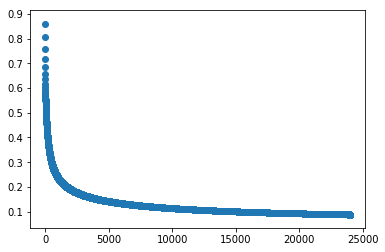

In [52]:
plt.scatter(iterations,neg_log_like_loss)

In [53]:
theta0_final

array([[-9.28073491]])

In [54]:
theta_final

array([[ 0.4878905 ],
       [ 3.6959606 ],
       [-1.85723609],
       [ 2.67972644],
       [-1.12937734],
       [ 0.82762216],
       [ 3.77252557],
       [ 5.34880357],
       [-2.59491577],
       [-6.0060303 ],
       [ 4.70476677],
       [ 0.7906066 ],
       [ 2.47422396],
       [ 3.2836588 ],
       [ 0.55027882],
       [-2.40081442],
       [-2.69492689],
       [-1.39501092],
       [-0.9999354 ],
       [-2.80045697],
       [ 3.33243315],
       [ 4.7378021 ],
       [ 2.50419221],
       [ 4.97557597],
       [ 1.75122009],
       [ 0.72808486],
       [ 3.64209996],
       [ 7.01231787],
       [ 0.75021016],
       [-1.1846052 ]])

In [55]:
#How will you perform testing in Logistic Regression

In [56]:
print("Training Data Accuracy")
cost_mse= np.mean((temp)**2)
accuracy = 100 - ((cost_mse/np.mean(X))*100)

print("Cost",cost_mse)
print("DataMean",np.mean(X))
print("Accuracy",accuracy,"%")


Training Data Accuracy
Cost 0.023799945079113004
DataMean 0.3434302648430594
Accuracy 93.06993369090837 %


In [57]:
testing_data.shape

(171, 33)

In [59]:
testing_data['diagnosis'].replace(to_replace='M',value=1,inplace=True)

In [60]:
testing_data['diagnosis'].replace(to_replace='B',value=1,inplace=True)

In [61]:
C_test = np.array(testing_data['diagnosis'])

In [62]:
testing_data = testing_data.drop((['id', 'diagnosis', 'Unnamed: 32']),axis=1) 

In [63]:
testing_data.shape

(171, 30)

In [64]:
temp_test = (H_theta0_theta - C_test)

In [65]:
print("Testing Data Accuracy")
cost_mse= np.mean((temp_test)**2)
accuracy = 100 - ((cost_mse/np.mean(X))*100)

print("Cost",cost_mse)
print("DataMean",np.mean(X))
print("Accuracy",accuracy,"%")

Testing Data Accuracy
Cost 0.04527593732310709
DataMean 0.3434302648430594
Accuracy 86.81655580244296 %
